#  Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data

In [2]:
data = pd.read_excel('iris.xls')

## First 5 rows of the data

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data shape (rows and columns) 

In [4]:
data.shape

(150, 5)

## Data info ( columns names, null values, data types)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Data describe ( measure of central tendency)

In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualizing data using pairplot

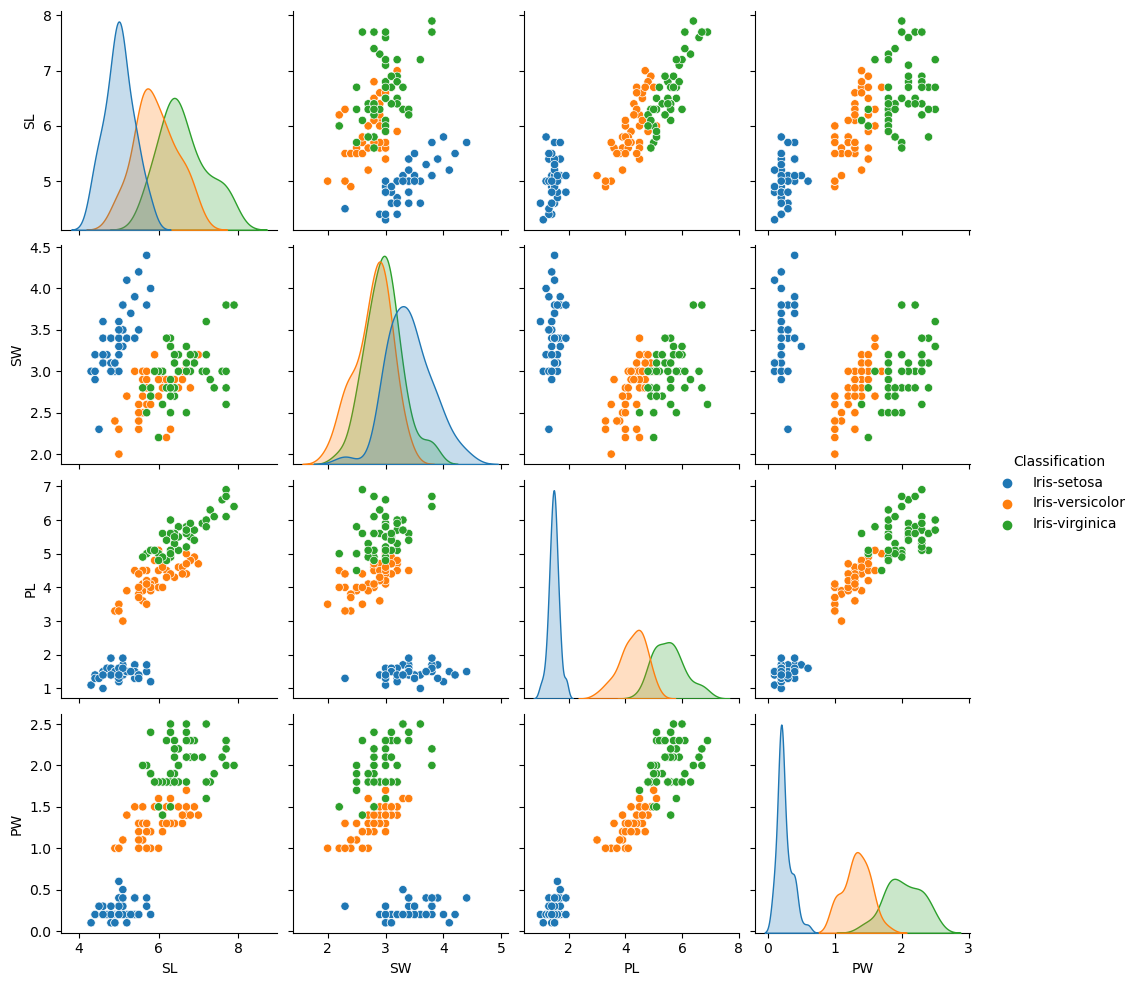

In [7]:
sns.pairplot(data, hue = 'Classification');

### Data correlation using Heatmap

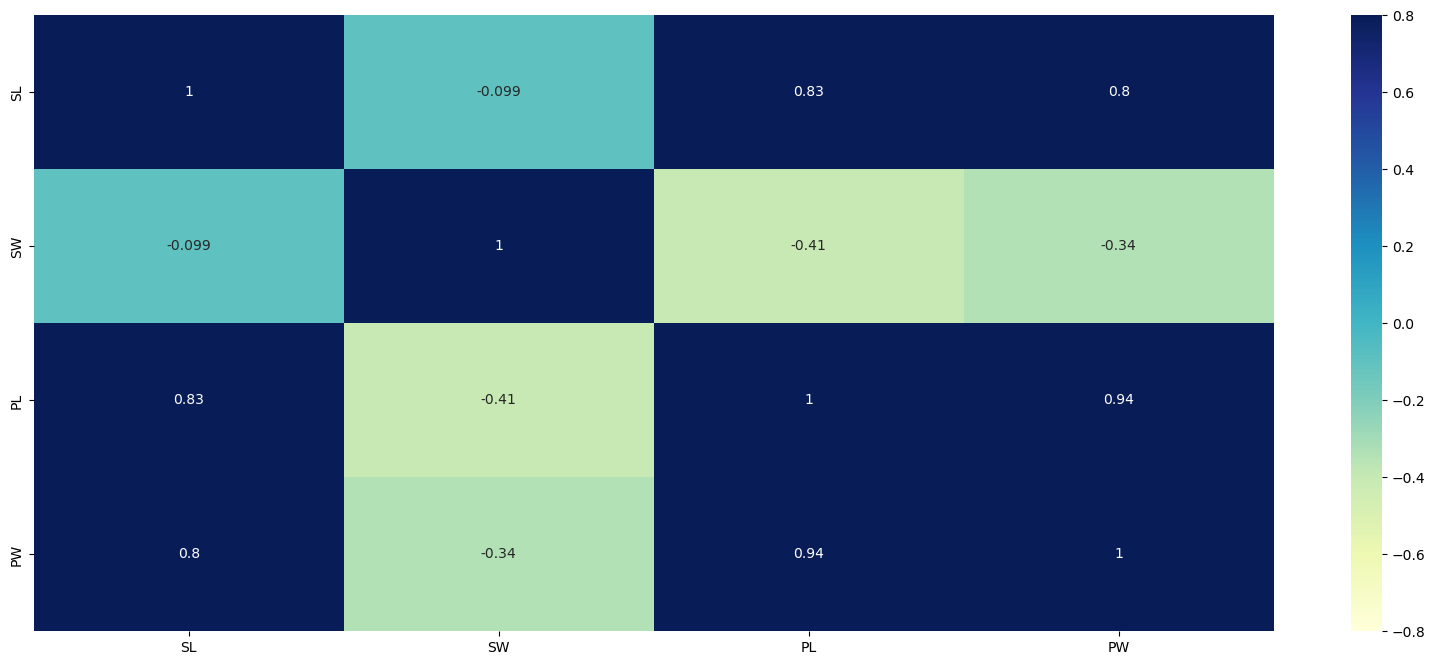

In [63]:
corrmatrix= data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True,vmax=0.8, vmin=-0.8,cmap='YlGnBu')
plt.show()

###  Finding number of null values

In [9]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

## Using boxplots to find outliers

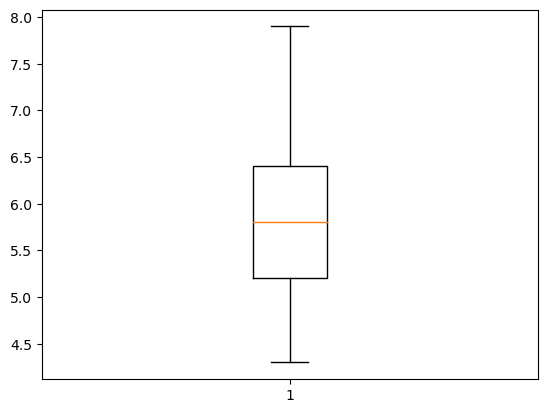

In [60]:
plt.boxplot(data['SL'])
plt.show()

In [11]:
# no outliers

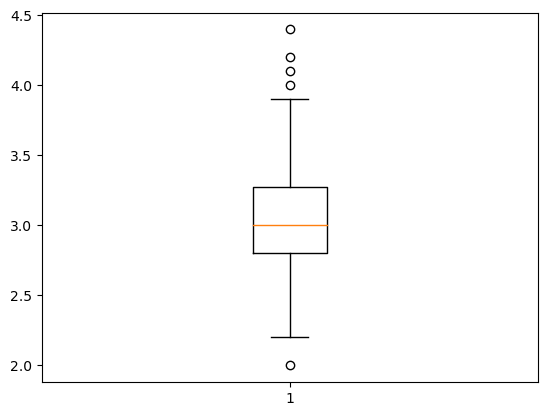

In [59]:
plt.boxplot(data['SW'])
plt.show()

In [13]:
# outliers are present

####  Finding and removing outliers

In [14]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

In [15]:
print(Q1)
print(Q2)
print(Q3)

nan
nan
nan


In [16]:
IQR=Q3-Q1
print(Q3-Q1)

nan


In [17]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [18]:
print(lower_limit)
print(upper_limit)

nan
nan


In [19]:
outlier=[]
for x in data['SW']:
  if((x>upper_limit) or (x<lower_limit)):
    outlier.append(x)

In [20]:
outlier

[]

In [21]:
#removing outliers
index_out=data['SW']>upper_limit

In [22]:
#droping outlier values
data.drop(data.loc[index_out].index,inplace=True)

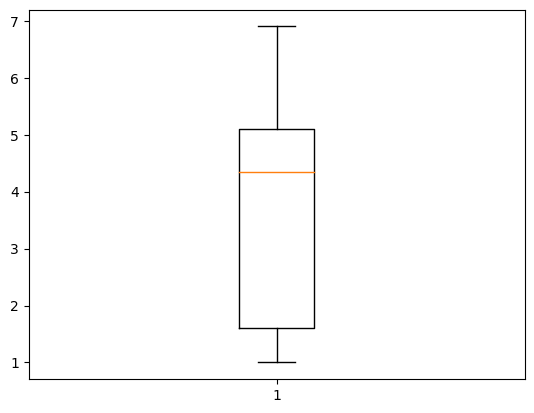

In [58]:
plt.boxplot(data['PL'])
plt.show()

In [24]:
# no outliers

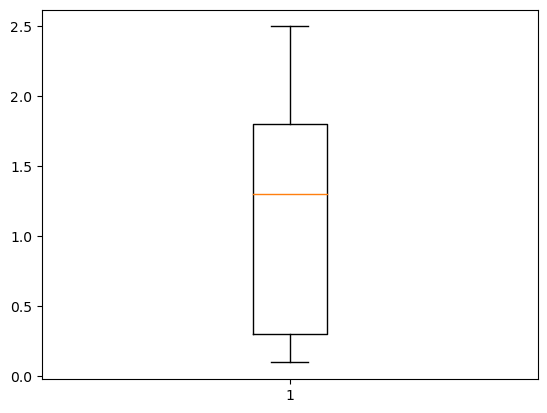

In [25]:
plt.boxplot(data['PW'])
plt.show()

In [26]:
# no outliers

### Filling null values with median

In [27]:
for col in['SL','SW','PL','PW']:
    data[col]=data[col].fillna(data[col].median())

In [28]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### Checking measures of central tendency after cleaning the data 

In [29]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Encode the data

In [30]:
data1 = pd.get_dummies(data) # one hot encoding
data1.head()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,5.8,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


### Split the data into training and test sets

In [31]:
y= data['Classification']
x = data.drop('Classification', axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

## Using classification models

In [32]:
# logistic regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
model = logr.fit(x_train,y_train) #model creation
y_pred = model.predict(x_test)

C:\Users\Aparna.DESKTOP-R4D5RJ8\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score

In [34]:
print('confusion matrix is: ',(confusion_matrix(y_test,y_pred)))

confusion matrix is:  [[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


In [35]:
print('accuracy_score is: ',(accuracy_score(y_test,y_pred)))

accuracy_score is:  0.9736842105263158


In [36]:
# kNN
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    knn= KNeighborsClassifier(n_neighbors= k)
    model1 = knn.fit(x_train, y_train)
    y1_pred_knn = model1.predict(x_test)
    acc = accuracy_score(y_test, y1_pred_knn)
    metric_k.append(acc)

C:\Users\Aparna.DESKTOP-R4D5RJ8\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Aparna.DESKTOP-R4D5RJ8\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will n

In [37]:
metric_k

[0.9473684210526315,
 0.9736842105263158,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]

In [38]:
plt.plot(neighbors, metric_k, '-*')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [39]:
knn= KNeighborsClassifier(n_neighbors=k)
model1= knn.fit(x_train, y_train)
y1_pred_knn= model1.predict(x_test)

C:\Users\Aparna.DESKTOP-R4D5RJ8\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [40]:
print('confusion matrix is: ',(confusion_matrix(y_test,y1_pred_knn)))

confusion matrix is:  [[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


In [41]:
print('accuracy_score is: ',(accuracy_score(y_test,y1_pred_knn)))

accuracy_score is:  0.9736842105263158


In [42]:
# SVM model
from sklearn.svm import SVC

svm_clf = SVC(kernel= 'rbf')  # rbf

svm_clf.fit(x_train, y_train)

y1_pred = svm_clf.predict(x_test)

In [43]:
print('confusion matrix is: ',(confusion_matrix(y_test,y1_pred)))

confusion matrix is:  [[14  1  0]
 [ 0 11  0]
 [ 0  0 12]]


In [44]:
print('accuracy_score is: ',(accuracy_score(y_test,y1_pred)))

accuracy_score is:  0.9736842105263158


In [45]:
svm_clf = SVC(kernel= 'poly')  #polynomial 

svm_clf.fit(x_train, y_train)

y2_pred = svm_clf.predict(x_test)

In [46]:
print('confusion matrix is: ',(confusion_matrix(y_test,y2_pred)))

confusion matrix is:  [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


In [47]:
print('accuracy_score is: ',(accuracy_score(y_test,y2_pred)))

accuracy_score is:  0.9736842105263158


In [48]:
svm_clf = SVC(kernel= 'linear')  #linear

svm_clf.fit(x_train, y_train)

y3_pred = svm_clf.predict(x_test)

In [49]:
print('confusion matrix is: ',(confusion_matrix(y_test,y3_pred)))

confusion matrix is:  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [50]:
print('accuracy_score is: ',(accuracy_score(y_test,y3_pred)))

accuracy_score is:  1.0


In [51]:
# decision trees
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

dt_clf.fit(x_train, y_train)

y4_pred = dt_clf.predict(x_test)

In [52]:
print('confusion matrix is: ',(confusion_matrix(y_test,y4_pred)))

confusion matrix is:  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [53]:
print('accuracy_score is: ',(accuracy_score(y_test,y4_pred)))

accuracy_score is:  1.0


In [54]:
# random forest
from sklearn.ensemble import RandomForestClassifier

rf_clf= RandomForestClassifier(random_state=42)

rf_clf.fit(x_train, y_train)

y5_pred = rf_clf.predict(x_test)

In [55]:
print('confusion matrix is: ',(confusion_matrix(y_test,y5_pred)))

confusion matrix is:  [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [56]:
print('accuracy_score is: ',(accuracy_score(y_test,y5_pred)))

accuracy_score is:  1.0
